<a href="https://colab.research.google.com/github/s-kp/CapstoneProject-MLRegression/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

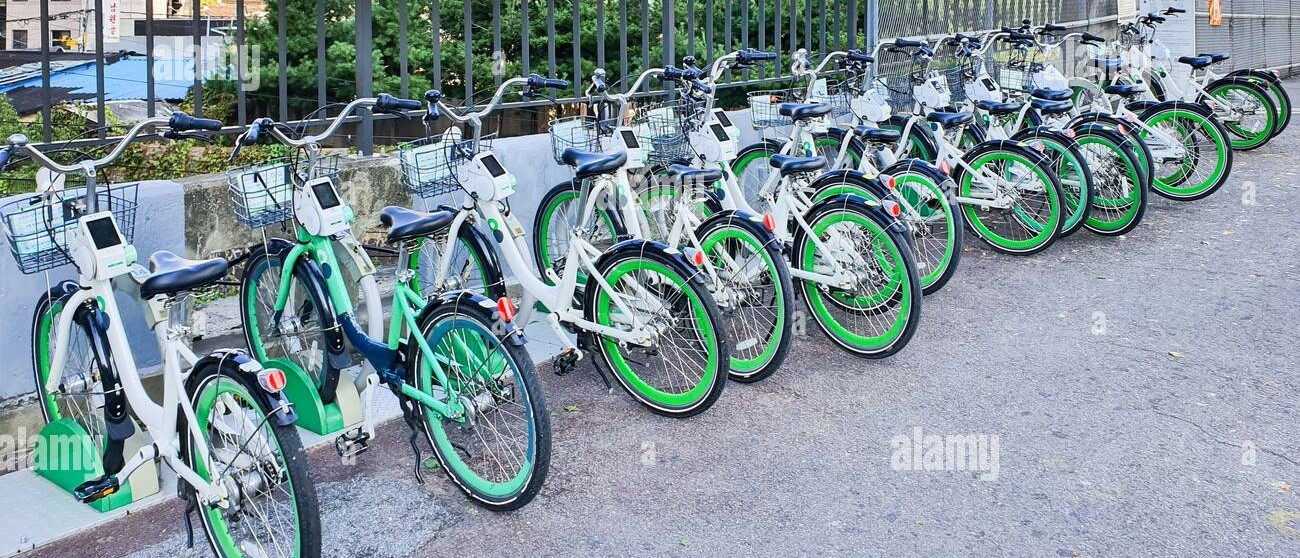

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [172]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [173]:
# Defining url of saved csv file
path = 'https://drive.google.com/uc?id=1Tl--fvtuxxdTwY5cBUNnN9y2-EO2OTLc'

# Importing dataset to create a dataframe
df = pd.read_csv(path,encoding = 'latin',parse_dates=['Date'])

In [174]:
# Checking shape pf dataframe
df.shape

(8760, 14)

In [175]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [176]:
# Renaming Columns
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [177]:
# Checking top 5 records in dataframe
df.head()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [178]:
# Checking bottom 5 records in dataframe
df.tail()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8760 non-null   datetime64[ns]
 1   bike_count       8760 non-null   int64         
 2   hour             8760 non-null   int64         
 3   temp             8760 non-null   float64       
 4   humidity         8760 non-null   int64         
 5   wind             8760 non-null   float64       
 6   visibility       8760 non-null   int64         
 7   dew_temp         8760 non-null   float64       
 8   sunlight         8760 non-null   float64       
 9   rain             8760 non-null   float64       
 10  snow             8760 non-null   float64       
 11  season           8760 non-null   object        
 12  holiday          8760 non-null   object        
 13  functioning_day  8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(

In [180]:
df.describe(percentiles=[.01,.25,.5,.75,.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
bike_count,8760.0,704.602055,644.997468,0.0,0.000,191.00,504.50,1065.25,2526.23,3556.00
hour,8760.0,11.500000,6.922582,0.0,0.000,5.75,11.50,17.25,23.00,23.00
temp,8760.0,12.882922,11.944825,-17.8,-12.741,3.50,13.70,22.50,35.10,39.40
humidity,8760.0,58.226256,20.362413,0.0,17.000,42.00,57.00,74.00,97.00,98.00
wind,8760.0,1.724909,1.036300,0.0,0.100,0.90,1.50,2.30,4.70,7.40
visibility,8760.0,1436.825799,608.298712,27.0,173.000,940.00,1698.00,2000.00,2000.00,2000.00
dew_temp,8760.0,4.073813,13.060369,-30.6,-24.800,-4.70,5.10,14.80,24.70,27.20
sunlight,8760.0,0.569111,0.868746,0.0,0.000,0.00,0.01,0.93,3.17,3.52
rain,8760.0,0.148687,1.128193,0.0,0.000,0.00,0.00,0.00,4.00,35.00
snow,8760.0,0.075068,0.436746,0.0,0.000,0.00,0.00,0.00,2.50,8.80


In [181]:
# Missing data counts
df.isnull().sum()

date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
sunlight           0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

In [182]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


## **EDA**

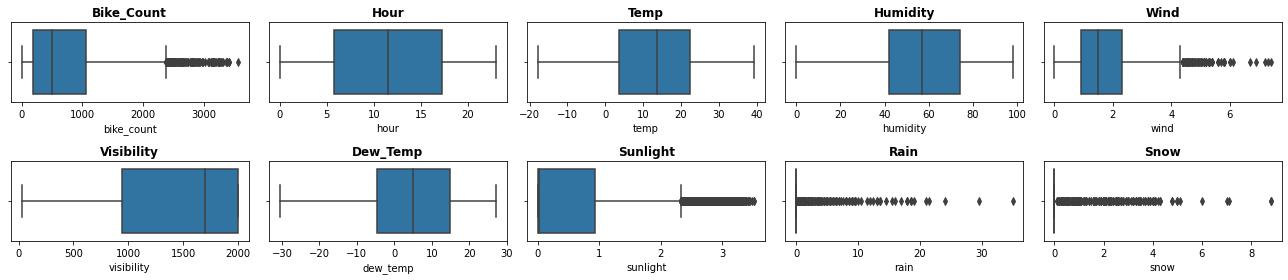

In [183]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

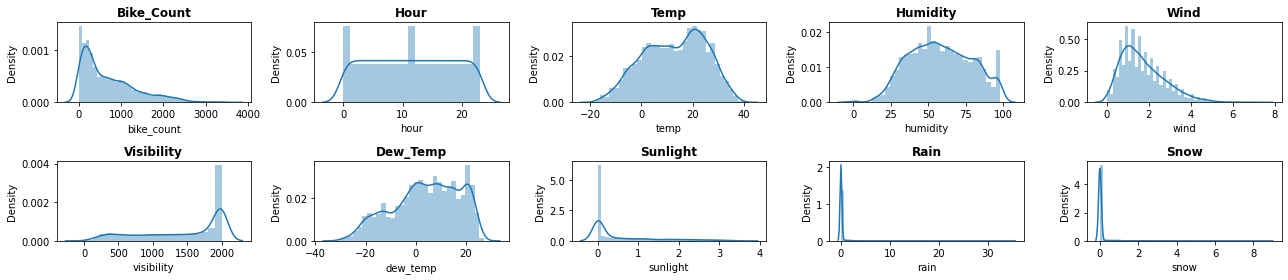

In [184]:
# Visualizing the distributions.
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

We see outliers only on the upper side of the few columns such as Wind speed, Solar Radiation, Rainfall, Snowfall but lets not treat them because these events are rare and are not outliers.




##**Cleaning and Manipulating dataset**

In [185]:
# Extracting new features from date and hour column
df['weekend'] = df['date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0 )
df['timeshift'] = df['hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

# Dropping the Date column
df.drop(columns=['date'], inplace = True)

In [186]:
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['season', 'holiday', 'functioning_day', 'timeshift']

In [187]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: season, dtype: int64 

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64 

Yes    8465
No      295
Name: functioning_day, dtype: int64 

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64 



In [188]:
# Defining a label encoder based on above data
encoder = {'holiday':{'Holiday':1, 'No Holiday':0},'functioning_day':{'Yes':1, 'No': 0},
          'timeshift': {'night':0, 'day':1, 'evening':2}}

In [189]:
# Label Encoding
df = df.replace(encoder)

# One Hot Encoding
df = pd.get_dummies(df, columns=["season"], prefix='', prefix_sep='')

In [190]:
# Weekends are also holidays hence we can combine them by assigning equal weights
df['holiday'] = 0.5*df['weekend']+0.5*df['holiday']

# Dropping the weekend column
df.drop(columns=['weekend'], inplace = True)

In [191]:
# Creating new Feature named regular day by excluding holidays from the functioning days
df['regular_day'] = df['functioning_day']-df['holiday']

In [192]:
# New look
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,holiday,functioning_day,timeshift,Autumn,Spring,Summer,Winter,regular_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1.0


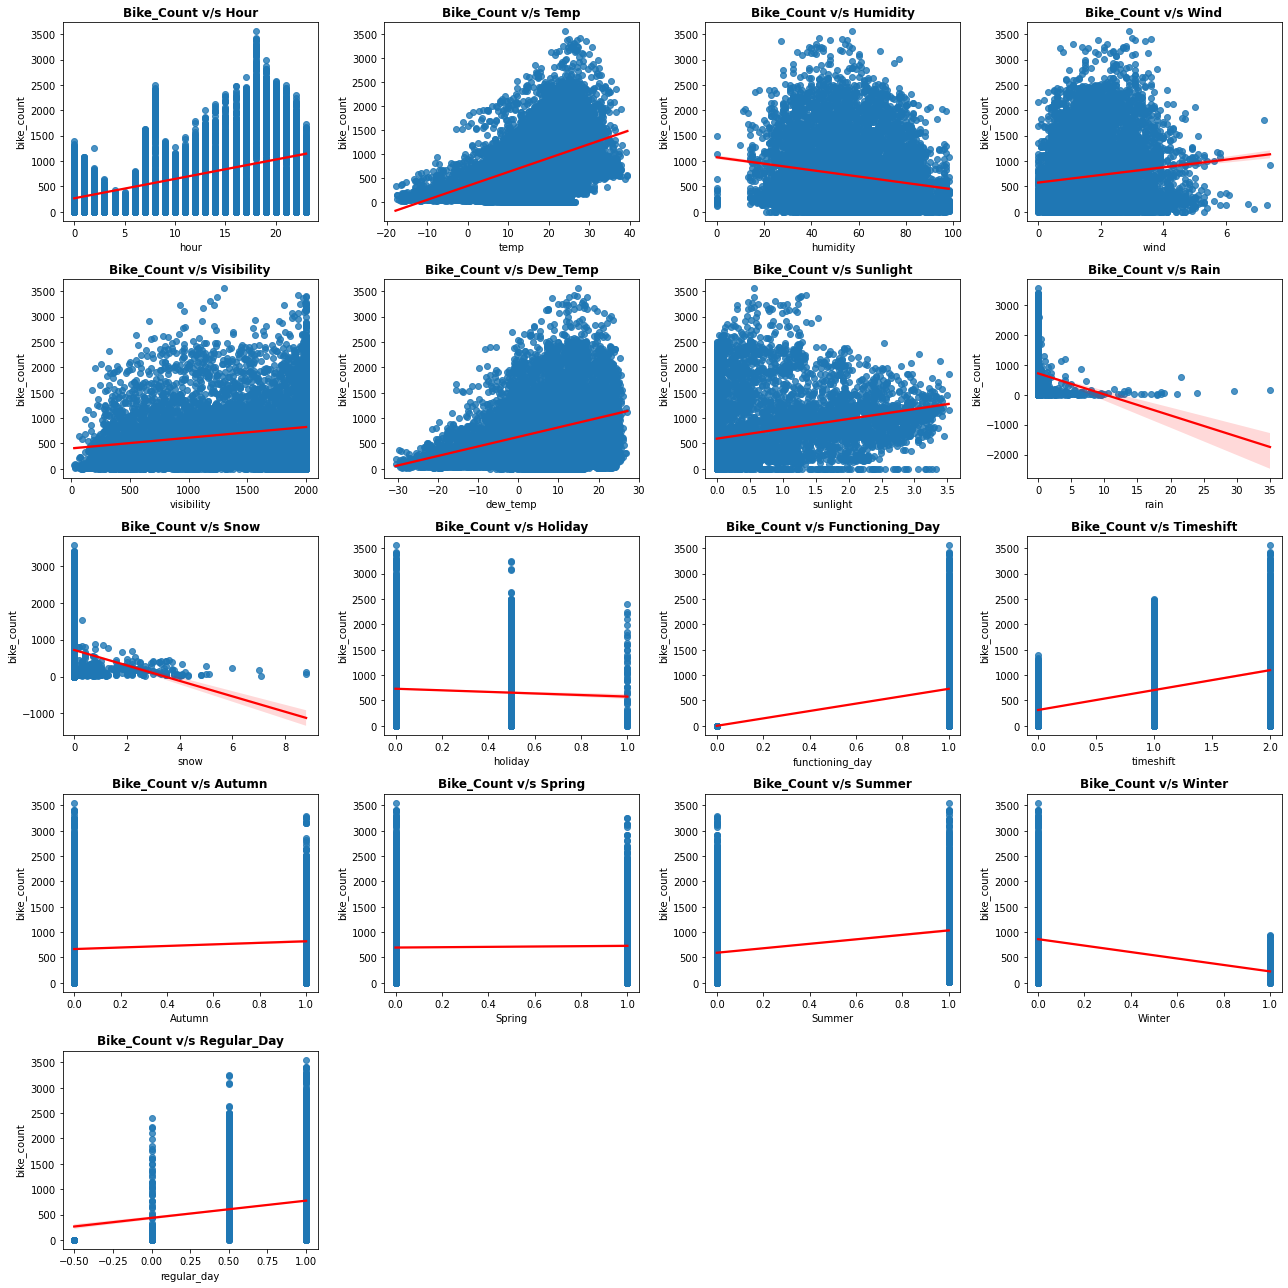

In [193]:
independent_variables = [i for i in df.columns if i not in ['bike_count']]

# Checking Linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = df, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

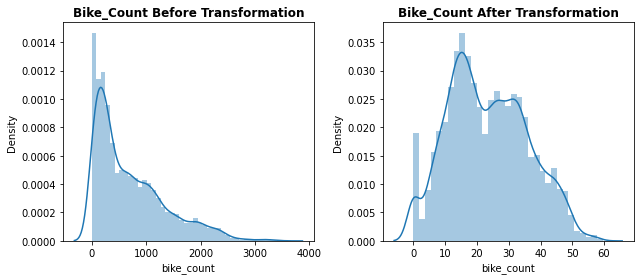

In [194]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(9,4))
plot = plt.subplot(1,2,1)
sns.distplot(df['bike_count']).set_title('Bike_Count Before Transformation',weight='bold')
plot = plt.subplot(1,2,2)
sns.distplot(np.sqrt(df['bike_count'])).set_title('Bike_Count After Transformation',weight='bold')
plt.tight_layout()



##**Removing Multicolinearity**

In [195]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

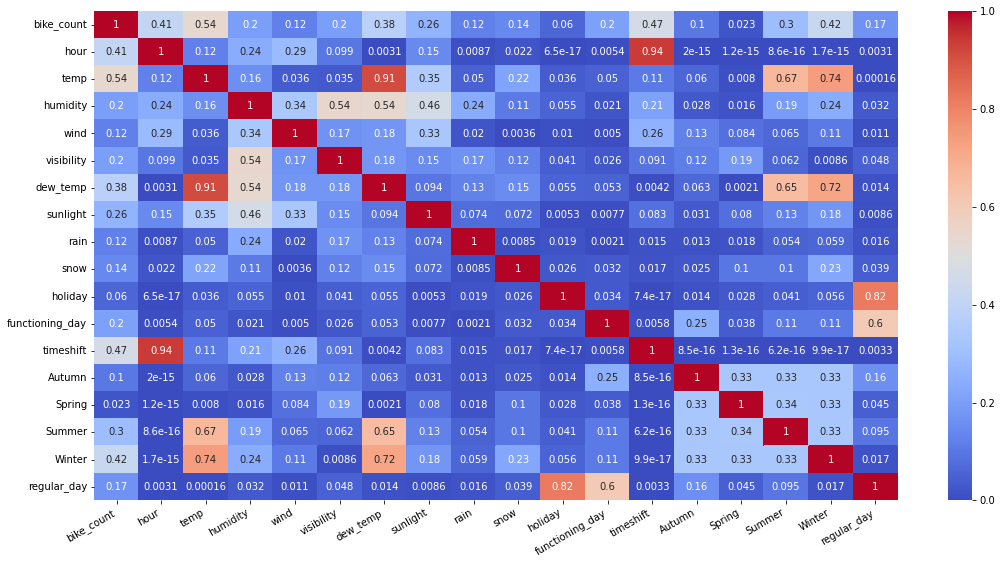

In [196]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

We can see some highly correlated features. Lets treat them by excluding them from dataset and checking the variance inflation factors.

In [197]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['bike_count']]
calc_vif(df[independent_variables])

,variables,VIF
0,regular_day,inf
1,functioning_day,inf
2,holiday,inf
3,dew_temp,117.749050
4,Summer,114.184845
5,Spring,110.713812
6,Autumn,108.703887
7,Winter,105.803366
8,temp,89.813094
9,humidity,20.647217


Since Summer and Winter can also be classified on the basis of temperature and we already have that feature present. Even if we drop these features the useful information will not be lost. So lets drop them.

In [198]:
# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df.columns if i not in ['bike_count','Winter','Summer','dew_temp',
                                                            'holiday','functioning_day','hour']]
calc_vif(df[independent_variables])

,variables,VIF
0,humidity,7.581287
1,regular_day,6.784012
2,visibility,5.473652
3,wind,4.689157
4,temp,3.280103
5,timeshift,2.912771
6,sunlight,2.357073
7,Autumn,1.558973
8,Spring,1.548732
9,snow,1.143107


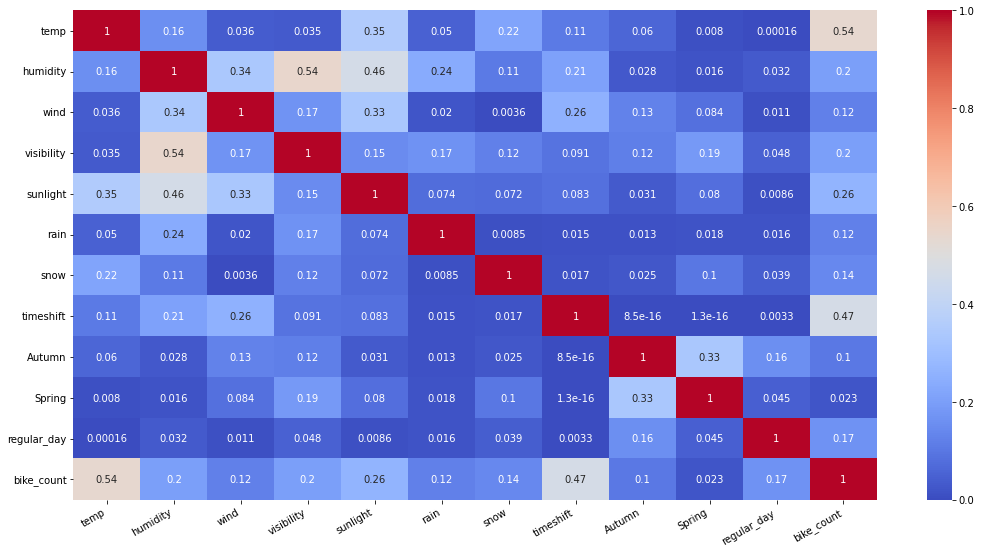

In [199]:
# Updating the dataset
dataset = df[independent_variables + ['bike_count']]

#checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

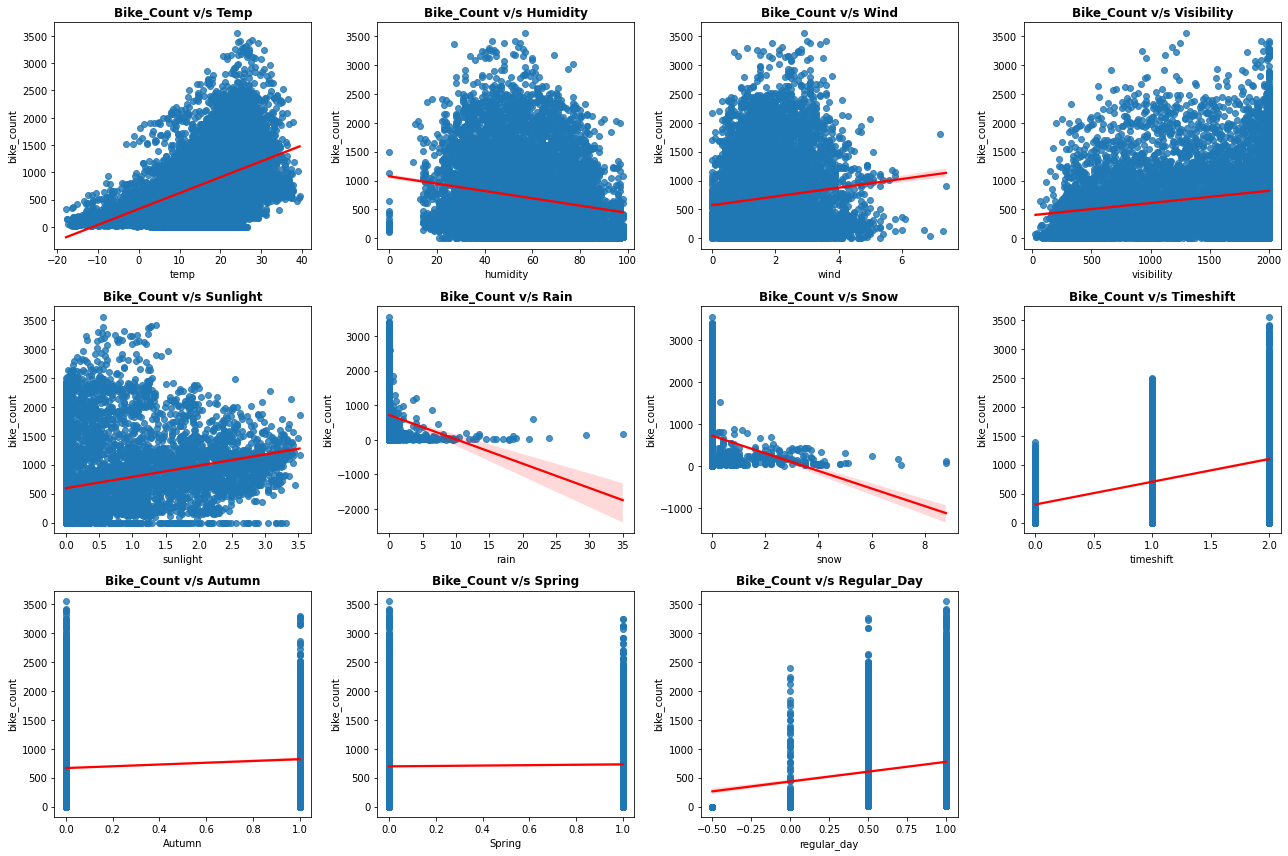

In [200]:
# Checking Linearity of the new dataset
plt.figure(figsize=(18,12))
for n,column in enumerate(independent_variables):
  plt.subplot(3, 4, n+1)
  sns.regplot(data = dataset, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [201]:
# Checking top 5 rows of the cleaned dataset
dataset.head()

,temp,humidity,wind,visibility,sunlight,rain,snow,timeshift,Autumn,Spring,regular_day,bike_count
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,1.0,254
1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1.0,204
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1.0,173
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1.0,107
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1.0,78




#**Model building**

##**Prerequisites**

In [202]:
# Defining variables required
scaler = MinMaxScaler()
y = np.sqrt(dataset['bike_count'])
features = [i for i in df.columns if i not in ['bike_count']]
independent_variables = [i for i in df.columns if i not in ['bike_count','Winter',
                        'Summer','dew_temp','holiday','functioning_day','hour']]

In [203]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Calculating Evaluation Matrix
  mse = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2 = r2_score(a,p)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(a,p))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

##**Linear Regressor**

In [204]:
# Splitting the data into train and test
X = scaler.fit_transform(dataset[independent_variables])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

MSE : 173842.47116684186
RMSE : 416.9442062996461
MAE : 288.92550836065703
Train R2 : 0.5786592459655864
Test R2 : 0.5846282232725868
Adjusted R2 :  0.5820023097415514


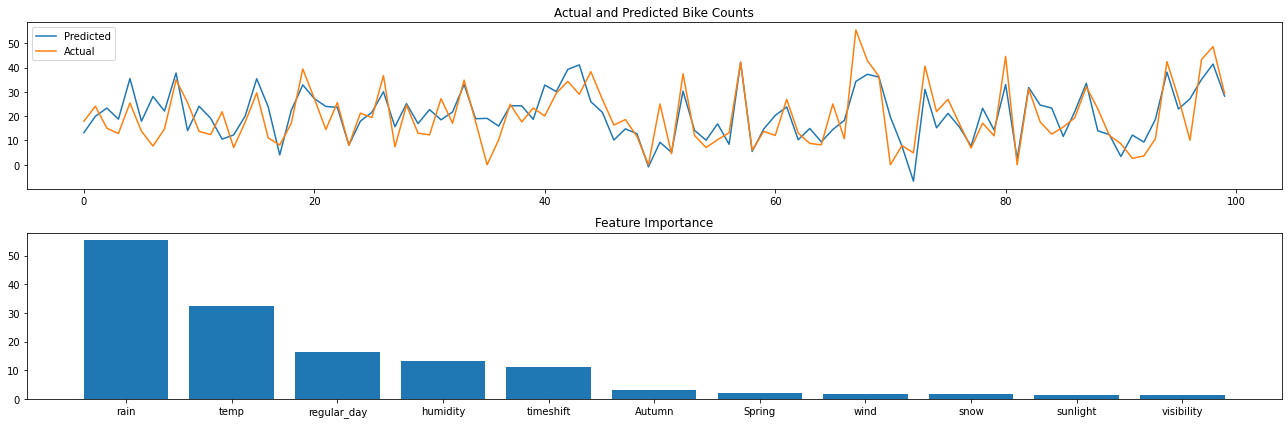

LinearRegression()

In [205]:
# Fitting Linear Regression Model
lr = LinearRegression()
analyse_model(lr, X_train, X_test, y_train, y_test)

##**Decision Tree Regressor**

In [206]:
# Splitting the data into train and test by redefining X
X = scaler.fit_transform(df[features])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

In [207]:
# Decision Forest Regressor GridSearch
grid = {'max_depth':np.arange(8,20,3), 'min_samples_leaf':np.arange(5,15,3)}
dt = GridSearchCV(DecisionTreeRegressor(), param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
dt.fit(X_train, y_train).best_params_

{'max_depth': 14, 'min_samples_leaf': 11}

MSE : 58310.96801199171
RMSE : 241.47664071705094
MAE : 148.77807981995778
Train R2 : 0.9085724348514148
Test R2 : 0.8606742631805377
Adjusted R2 :  0.8593083245842685


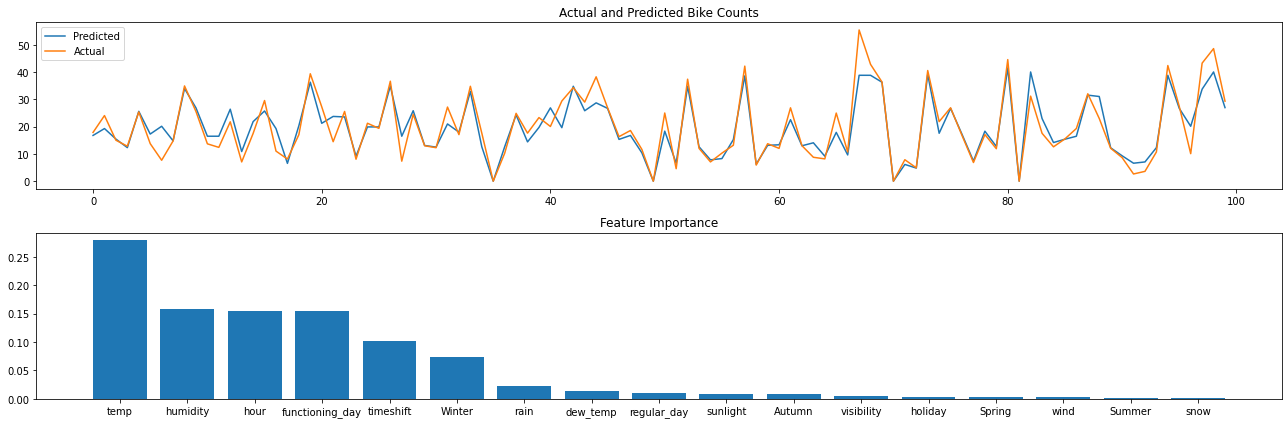

DecisionTreeRegressor(max_depth=14, min_samples_leaf=11, random_state=0)

In [208]:
# Analysing the best model
dt = DecisionTreeRegressor(max_depth=14, min_samples_leaf=11, random_state=0)
analyse_model(dt, X_train, X_test, y_train, y_test)

##**Random Forest Regressor**

In [209]:
# Random Forest Regressor GridSearch
grid = {'n_estimators':[100,200], 'max_depth':[8,12,15], 'min_samples_leaf':[3,5,7]}
rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=grid, scoring='neg_mean_squared_error', cv=5)
rf.fit(X_train, y_train).best_params_

{'max_depth': 15, 'min_samples_leaf': 3, 'n_estimators': 200}

MSE : 44731.77435673251
RMSE : 211.49887554484187
MAE : 125.08602758685494
Train R2 : 0.9606935327162338
Test R2 : 0.8931198086059555
Adjusted R2 :  0.8920719635922885


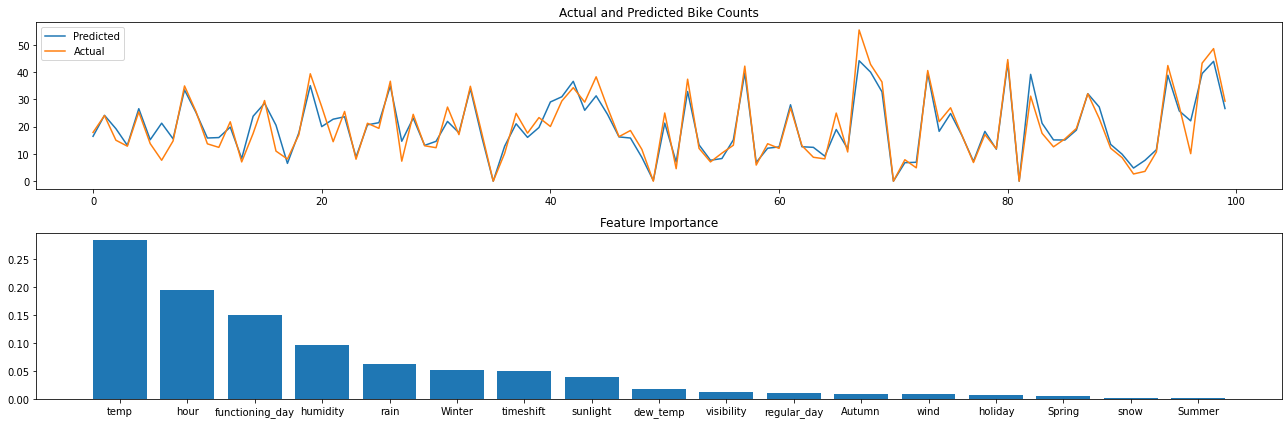

RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=200,
                      random_state=0)

In [210]:
# Analysing the best model
rf = RandomForestRegressor(max_depth=15, n_estimators=200, min_samples_leaf=3, random_state=0)
analyse_model(rf, X_train, X_test, y_train, y_test)

##**XGBoost Regressor**

In [211]:
# XGBoost Regressor GridSearch
grid = {'n_estimators':[200], 'max_depth':[8,12], 'eta':[0.05,0.08,0.1], 'min_samples_leaf':[3,5]}
xgb = GridSearchCV(XGBRegressor(silent=True, random_state=1), param_grid=grid, scoring='neg_mean_squared_error', cv=5)
xgb.fit(X_train, y_train).best_params_

{'eta': 0.05, 'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 200}

MSE : 37963.48417173912
RMSE : 194.84220326135485
MAE : 112.82076411745415
Train R2 : 0.987094986441488
Test R2 : 0.9092916721366416
Adjusted R2 :  0.9084023748046479


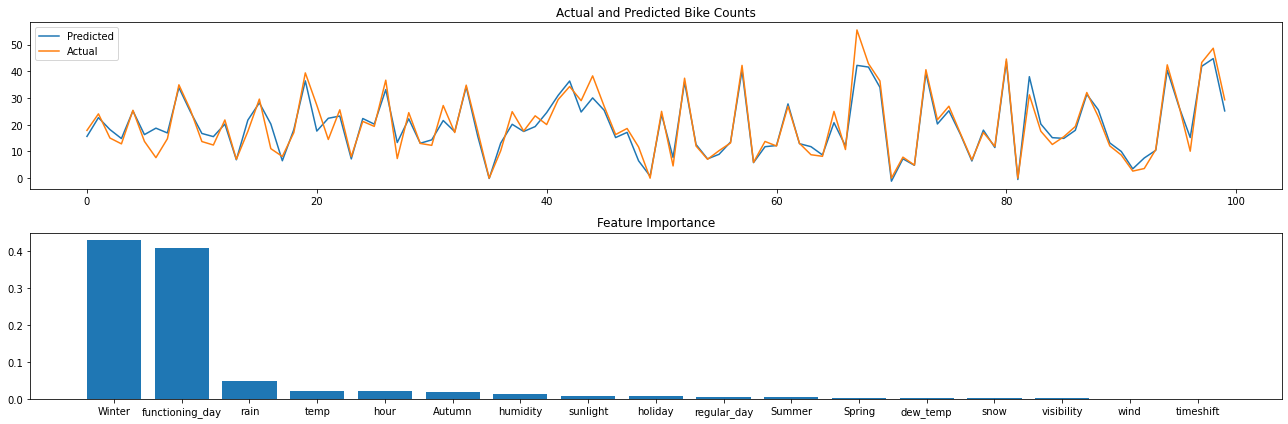

XGBRegressor(eta=0.05, max_depth=8, min_samples_leaf=3, n_estimators=200,
             random_state=1, silent=True)

In [212]:
# Analysing the best model
xgb = XGBRegressor(max_depth=8, n_estimators=200, eta=0.05, silent=True, min_samples_leaf=3, random_state=1)
analyse_model(xgb, X_train, X_test, y_train, y_test)

##**GradientBoosting Regressor**

In [213]:
# Cross validation to get best parameters
grid = {'n_estimators':[150], 'max_depth':[8,12], 'min_samples_leaf':[3,5]}
gbr = GridSearchCV(GradientBoostingRegressor(random_state=2), param_grid=grid, scoring='neg_mean_squared_error',cv=5)
gbr.fit(X_train, y_train).best_params_

{'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 150}

MSE : 39408.4494511482
RMSE : 198.51561513177796
MAE : 114.80152598994165
Train R2 : 0.9796204098994323
Test R2 : 0.9058391338047311
Adjusted R2 :  0.9049159880577187


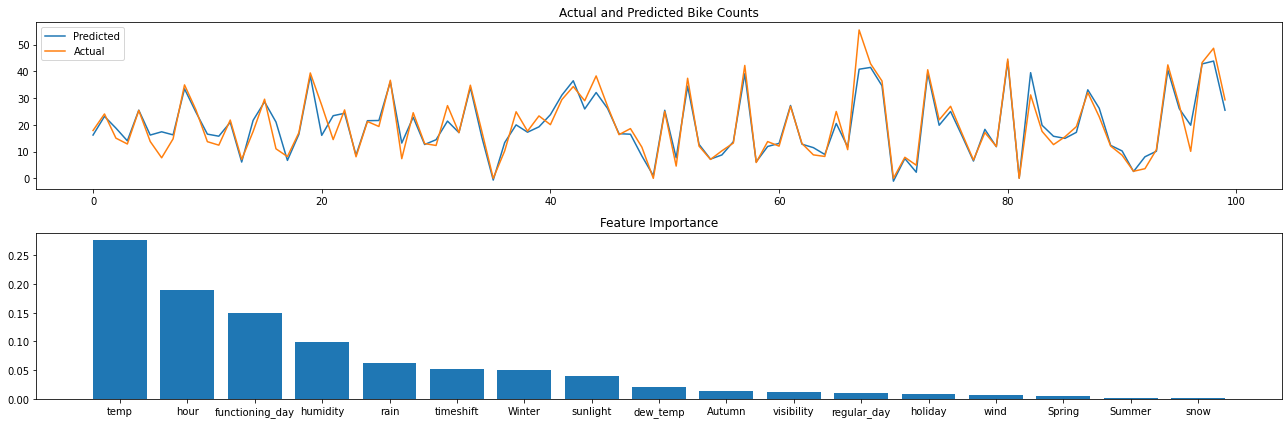

GradientBoostingRegressor(max_depth=8, min_samples_leaf=5, n_estimators=150,
                          random_state=2)

In [214]:
# Analysing the best model
gbr = GradientBoostingRegressor(max_depth=8, n_estimators=150, min_samples_leaf=5, random_state=2)
analyse_model(gbr, X_train, X_test, y_train, y_test)

##**Conclusion**

1. Rain is the most influencing feature and temperature is at the second place for LinearRegressor.
2. Temperature is the most important feature for DecisionTree and RandomForest and GradientBoosting Regressors.
3. Winter is the most important feature and functioning day is the second most for XGBoostRegressor.
3. RMSE Comparisons:
  1. LinearRegressor RMSE : 416.94
  2. DecissionTreeRegressor RMSE : 241.48
  3. RandomForestRegressor RMSE : 211.50
  4. XGBoostRegressor RMSE : 194.84
  5. GradientBoostingRegressor RMSE : 198.52

4. The feature temperature is on the top list for all the regressors except XGBoost.
5. XGBoost is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results.
4. XGBoostRegressor has the Least Root Mean Squared Error. So It can be considered as the best model for given problem.